### TODO

- Define an interface for `halfplane`.
- Implement codes in libflatsurf.


In [4]:
from flatsurf import *

In [5]:
s = translation_surfaces.regular_octagon()

In [7]:
t = s.delaunay_triangulation()

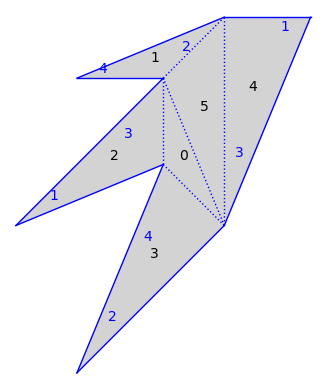

In [10]:
t.plot()

In [22]:
# Things that go into constructing an IsoDelaunayRegion
class IsoDelaunayTesselation:
    @classmethod
    def local_delaunay_halfplane(cls, H, edge, triangulation): pass

class HyperbolicPlane:
    def __init__(self, base_ring): pass
    def intersection(self, subsets): pass

H = HyperbolicPlane(t.base_ring())

halfplanes = [(hinge, IsoDelaunayTesselation.local_delaunay_halfplane(H, hinge, t))
              for hinge in t.edge_iterator()
              if t.triangle_flip(*hinge, test=True)]

polygon = H.intersection([halfplane for (hinge, halfplane) in halfplanes])

# TODO: Should be done more efficiently.
hyperbolic_edge_to_hinges = {
    hyperbolic_edge: [hinge
           for (hinge, halfplane) in halfplanes
           if halfplane in polygon.boundary()]
    for hyperbolic_edge in polygon.edges()
}

AttributeError: 'NoneType' object has no attribute 'edges'

In [23]:
# Things that go into face()
hyperbolic_edge = polygon.edges()[0]

cross = t.copy()
for hinge in hyperbolic_edge_to_hinges[hyperbolic_edge]:
    cross.triangel_flip(*hinge, in_place=True)

# Run IDR algorithm from above to build the next polygon.

AttributeError: 'NoneType' object has no attribute 'edges'

In [20]:
# Finding (self-)similarities

# TODO:
# Count the automorphisms using codes; the resulting group is finite cyclic so generated by a rotation.
# Determine existence of isomorphism using codes; find one isomorphism, ideally using codes.